# Hough Transform Overview

## Hesse normal form

Each straight line can be represented as follows:
$$r = x\cos\theta + y\sin\theta$$

<img src="data/hesse.jpg">

The representation is explicit (why?).

## The algorithm of performing Hough Transform

### Contour image

First of all, we need a contour, boolean image to process. The contour image can be obtained by using either simple edge detectors like sobel and roberts filters or more advanced, multi-stage like canny. Examples below.

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.filters import sobel, roberts

In [114]:
# An image with clearly visible straight line as a ground plane
land = plt.imread('data/hough/land.jpeg')

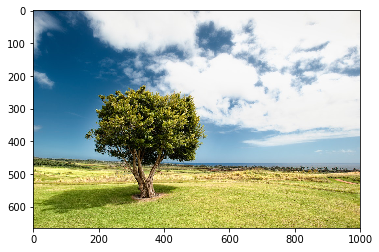

In [115]:
plt.imshow(land)

In [117]:
# Need to convert image
land_gray = rgb2gray(land)

land_sobel = sobel(land_gray)
land_roberts = roberts(land_gray)
land_canny = canny(land_gray)

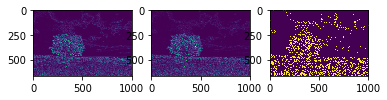

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
axs[0].imshow(land_sobel)
axs[1].imshow(land_roberts)
axs[2].imshow(land_canny)

In general, the more clearly detected edges, the better hough transform results. Hence, the canny is prefered.

### Point voting phase

**Parameters**
  + Theta
  + Threshold
  + Params classifying wheter the line occurs or not
    + gaps length
    + minmal subline length
    + and more, depends on various heuristics

<img src="data/lines.png">

For each 1/True point we scan the plane by rotating the line with respect to the specified theta. Then, check the number of points belonging to the line (how?) and decide if vote fot he line. If yes, the point in hesse coordinates coresponding to this line increases its value 

###  Bring the idea to life

In [121]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line

#### Classic straight-line Hough transform

In [76]:
h, theta, d = hough_line(land_contour)

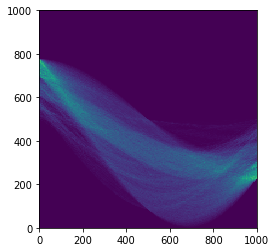

In [135]:
# Skip the correct scale of axes (just to see the idea)
plt.imshow(h, extent=[0, 1000, 0, 1000])

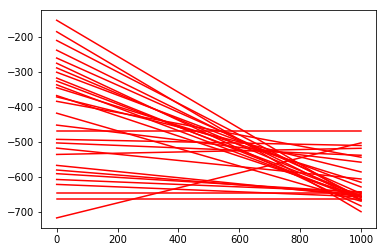

In [132]:
row1, col1 = land_contour.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    plt.plot((0, col1), (-y0, -y1), '-r')

#### Probabilistic Hough transform 

In [109]:
lines = probabilistic_hough_line(land_contour, threshold=10, line_length=5,
                                 line_gap=3)

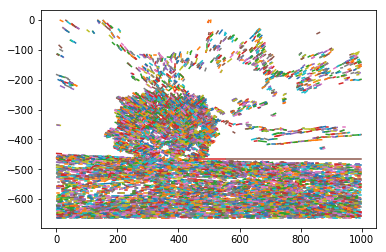

In [131]:
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (-p0[1], -p1[1]))

In [155]:
lines2 = probabilistic_hough_line(land_contour, threshold=100, line_length=40,
                                  line_gap=3)

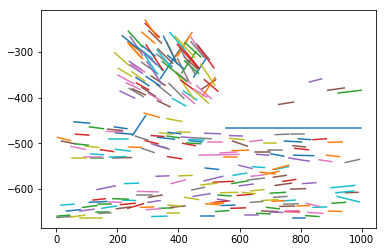

In [156]:
for line in lines2:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (-p0[1], -p1[1]))

### How it can help us predict the horizon with a high precision?